# Introducción

Los sideróforos, compuestos especializados en la quelación de hierro, desempeñan un papel fundamental en la microbiología y biotecnología. Estos agentes quelantes, secretados por microorganismos en ambientes limitados en hierro, facilitan la solubilización y transporte del hierro esencial para la supervivencia celular. La investigación científica reconoce la importancia crítica de los sideróforos en diversos contextos biológicos, desde la promoción del crecimiento de plantas hasta su rol en infecciones patogénicas y su potencial aplicación en terapias médicas y remediación ambiental (Hider y Kong, 2010; Wang et al., 2009).

En este contexto, la Siderophores Database es una valiosa fuente de información, albergando perfiles detallados de 221 sideróforos. Cada entrada en esta base de datos documenta no solo el nombre del compuesto y el microorganismo asociado sino también su tipología específica y la cantidad de grupos quelantes, como hidroxamatos, catecolatos, α-hidroxicarboxilatos, entre otros, reflejando la diversidad estructural y funcional de estas moléculas.

Este trabajo se centra en aplicar técnicas avanzadas de aprendizaje automático para clasificar los sideróforos basándose en su actividad quelante. A través del desarrollo de modelos predictivos, se busca profundizar en la comprensión de las interacciones moleculares y fomentar el descubrimiento de nuevos compuestos con aplicaciones prácticas.


# Metodología

Se utilizó la base de datos "siderophores_database" extraída del siguiente repositorio de github:
https://github.com/inefable12/siderophores_database/tree/main

Para el desarrollo de esta investigación, se utilizó una metodología dividida en varias etapas clave: la extracción y preprocesamiento de datos, la división por categorías, la creación de un conjunto de datos estructurado y la implementación de un modelo de clasificación SVM.


**Preparación y Preprocesamiento de los Datos**

1. **Carga de Datos**: Los datos se cargaron en DataFrames de Pandas, que es una estructura de datos bidimensional etiquetada con ejes para filas y columnas en Python.

2. **Limpieza de Datos**: Se llevó a cabo la limpieza de datos, donde se identificaron y manejaron valores faltantes (NaN) y se corrigieron tipos de datos inconsistentes para asegurar un análisis numérico adecuado.

3. **Codificación de Categorías**: Las categorías de los grupos quelantes de los sideróforos se codificaron numéricamente y se consolidaron en categorías predominantes a través de un enfoque de agrupación y luego se redujeron a un conjunto de las tre categorías más comunes para un análisis más enfocado.

**Construcción del Modelo de Clasificación**

Para el análisis predictivo, se utilizó un modelo de Máquina de Vectores de Soporte (SVM) debido a su capacidad para manejar múltiples categorías y su eficacia en la clasificación de alta dimensión.

1. **Selección de Características**: Se seleccionaron las características moleculares de los DataFrames correspondientes, descartando aquellas que causaban problemas y no eran de gran relevancia.

2. **Estandarización de Características**: Todas las variables de entrada se estandarizaron para asegurar que el modelo SVM no fuera sesgado hacia las características con mayor magnitud.

3. **División del Conjunto de Datos**: Se dividió el conjunto de datos en dos: un conjunto de entrenamiento (80%) y un conjunto de prueba (20%) para evaluar la precisión del modelo.

4. **Entrenamiento del Modelo**: Se entrenó el modelo SVM con un kernel lineal y una estrategia de decisión "uno contra el resto" para adaptarse a la naturaleza multicategoría de la clasificación.

**Evaluación del Modelo**

La eficacia del modelo SVM se evaluó utilizando varias métricas:

1. **Matriz de Confusión**: Se generó una matriz de confusión para visualizar el rendimiento del modelo en la clasificación de cada categoría de los sideróforos.

2. **Reporte de Clasificación**: Se calculó un reporte de clasificación, que proporciona métricas como precisión, recall y puntuación F1 para cada categoría.

# Código:

## Carga de datos

Extracción y visualización general de los datos usando dataframes de pandas

In [229]:

import pandas as pd

# Cargar los archivos
db_general_info_path = './siderophores_database-main/Siderophore_DB.csv'
db1_path = './siderophores_database-main/Siderophore_DB1.csv'
db2_path = './siderophores_database-main/Siderophore_DB2.csv'
db3_path = './siderophores_database-main/Siderophore_DB3.csv'

# Leer los archivos CSV
db_general_info = pd.read_csv(db_general_info_path)
db1 = pd.read_csv(db1_path)
db2 = pd.read_csv(db2_path)
db3 = pd.read_csv(db3_path)
print(db_general_info.shape)
db_general_info.head()


(221, 14)


,ID,Compounds,Microorganism,hydroxamate,catecholate,a-hydroxycarboxylate,carboxylate,phenolate,citrate,other,SMILES,validate smiles,SMARTS,SELFIES
0,1,"2,3-dihydroxybenzoic acid","Azobacter vinelandii, Azospirillum lipoferum, ...",0,1,0,1,0,0,0,OC(=O)c1c(O)c(O)ccc1,True,[#8]-[#6](=[#8])-[#6]1:[#6](-[#8]):[#6](-[#8])...,[O][C][=Branch1][C][=O][C][=C][Branch1][C][O][...
1,2,"2,3-dihydroxybenzoylglycine",Bacillus subtilis,0,1,0,1,0,0,0,c1ccc(O)c(O)c1C(=O)NCC(O)=O,True,[#6]1:[#6]:[#6]:[#6](-[#8]):[#6](-[#8]):[#6]:1...,[C][=C][C][=C][Branch1][C][O][C][Branch1][C][O...
2,3,"2,3-dihydroxybenzoylserine","Aerobacter aerogenes, Escherichia ST2, Escheri...",0,1,0,1,0,0,0,OC[C@@H](C(O)=O)NC(=O)c1c(O)c(O)ccc1,True,[#8]-[#6]-[#6@@H](-[#6](-[#8])=[#8])-[#7]-[#6]...,[O][C][C@@H1][Branch1][=Branch1][C][Branch1][C...
3,4,"2,3-dihydroxybenzoylthreonine",Klebsiella oxytoca,0,1,0,1,0,0,0,O[C@H](C)[C@@H](C(O)=O)NC(=O)c1cccc(O)c1O,True,[#8]-[#6@H](-[#6])-[#6@@H](-[#6](-[#8])=[#8])-...,[O][C@H1][Branch1][C][C][C@@H1][Branch1][=Bran...
4,5,2-hydroxybenzoic acid,"Azospirillum lipoferum, Burkholderia cepacia",0,0,0,1,1,0,0,OC(=O)c1c(O)cccc1,True,[#8]-[#6](=[#8])-[#6]1:[#6](-[#8]):[#6]:[#6]:[...,[O][C][=Branch1][C][=O][C][=C][Branch1][C][O][...


In [230]:
db1.head()

,ID,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_amide,fr_benzene,fr_ester,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond
0,1,11.191262,-1.343472,11.191262,0.665370,0.522491,154.121,148.073,154.026609,58,...,0,0,0,0,0,1,0,1,2,1
1,2,12.228676,-3.436129,12.228676,0.586755,0.522624,211.173,202.101,211.048072,80,...,0,1,0,0,1,1,0,1,2,2
2,3,12.627825,-3.816337,12.627825,0.758838,0.442264,241.199,230.111,241.058637,92,...,0,1,0,0,1,1,0,1,2,2
3,4,12.854441,-4.102795,12.854441,0.884463,0.468346,255.226,242.122,255.074287,98,...,0,1,0,0,1,1,0,1,2,2
4,5,11.108779,-1.310880,11.108779,0.630759,0.610259,138.122,132.074,138.031694,52,...,0,0,0,0,0,1,0,1,1,0


In [231]:
db2.head()

,Unnamed: 0,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [232]:
db3.head()

,Unnamed: 0,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,8.094413,7.861189,1,0,13.168697,2.318335,4.636669,13.168697,1.197154,...,9.148784,41.129752,154.026609,9.060389,146,15,52.0,59.0,5.194444,2.500000
1,1,11.032230,10.263086,1,0,18.097095,2.335155,4.670310,18.097095,1.206473,...,9.344959,46.399340,211.048072,8.793670,386,20,70.0,78.0,6.805556,3.416667
2,2,12.406004,11.779674,1,0,20.564183,2.348305,4.696611,20.564183,1.209658,...,9.531336,49.175108,241.058637,8.609237,530,25,80.0,91.0,7.916667,3.944444
3,3,13.291450,12.587729,1,0,21.314984,2.355933,4.711866,21.314984,1.184166,...,9.632138,50.585433,255.074287,8.228203,612,27,86.0,98.0,8.777778,4.055556
4,4,7.318357,7.069195,1,0,11.945822,2.267184,4.534368,11.945822,1.194582,...,8.912069,39.310842,138.031694,8.626981,114,12,46.0,51.0,4.333333,2.305556


Se usarán los datos de la DB1 y DB3, ya que contienen características numéricas que pueden ser usadas directamente en la clasificación

## Limpieza de datos

### Identificación de los tipos de datos que no son numéricos

In [233]:
non_numeric_columns = db1.dtypes[db1.dtypes != 'int64'][db1.dtypes != 'float64']
print(non_numeric_columns)

ID    object
dtype: object


In [234]:
non_numeric_columns = db3.dtypes[db3.dtypes != 'int64'][db3.dtypes != 'float64']
print(non_numeric_columns)

AATS7dv    object
AATS8dv    object
AATS7d     object
AATS8d     object
AATS7s     object
            ...  
MDEN-33    object
MOMI-X     object
MOMI-Y     object
MOMI-Z     object
PBF        object
Length: 499, dtype: object


### Conversión a datos numéricos, manejo de valores NaN


In [235]:
non_numeric_columns = db3.dtypes[db3.dtypes != 'int64'][db3.dtypes != 'float64'].index

# Convertir todas las columnas no numéricas a numéricas, forzando los errores a NaN
for column in non_numeric_columns:
    db3[column] = pd.to_numeric(db3[column], errors='coerce')

db3.fillna(db3.mean(), inplace=True)
db3.fillna(value=0, inplace=True) 
db1.fillna(db1.mean(), inplace=True)

C:\Users\eduma\AppData\Local\Temp/ipykernel_27464/3230115378.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  db1.fillna(db1.mean(), inplace=True)


### Eliminación de ID
Se trabajará con los índices de los datos en orden, no con el ID ya que no siempre consta de valores numéricos o convertibles a numéricos

In [236]:
non_numeric_columns = db1.dtypes[db1.dtypes != 'int64'][db1.dtypes != 'float64']
print(non_numeric_columns)

ID    object
dtype: object


In [237]:
db1.drop(["ID"], axis=1)

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,...,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_amide,fr_benzene,fr_ester,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond
0,11.191262,-1.343472,11.191262,0.665370,0.522491,154.121,148.073,154.026609,58,0.339119,...,0,0,0,0,0,1,0,1,2,1
1,12.228676,-3.436129,12.228676,0.586755,0.522624,211.173,202.101,211.048072,80,0.322481,...,0,1,0,0,1,1,0,1,2,2
2,12.627825,-3.816337,12.627825,0.758838,0.442264,241.199,230.111,241.058637,92,0.328131,...,0,1,0,0,1,1,0,1,2,2
3,12.854441,-4.102795,12.854441,0.884463,0.468346,255.226,242.122,255.074287,98,0.328426,...,0,1,0,0,1,1,0,1,2,2
4,11.108779,-1.310880,11.108779,0.630759,0.610259,138.122,132.074,138.031694,52,0.338969,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,13.053345,-3.721588,13.053345,0.123679,0.544261,353.422,330.238,353.173942,136,0.327527,...,2,1,0,0,0,1,0,1,0,0
217,14.672799,-5.563063,14.672799,0.044514,0.049920,753.236,717.956,752.156986,268,0.352359,...,4,2,1,0,3,1,0,0,2,2
218,14.672799,-5.563063,14.672799,0.044514,0.049920,753.236,717.956,752.156986,268,0.352359,...,4,2,1,0,3,1,0,0,2,2
219,14.708209,-5.629267,14.708209,0.054724,0.069150,767.263,729.967,766.172636,274,0.352359,...,4,2,1,0,3,1,0,0,1,1


### Comprobación que no hay valores NaN

In [238]:
any_nan = db1.isna().any().any()
print(any_nan)
any_nan = db3.isna().any().any()
print(any_nan)

False
False


In [239]:
non_numeric_columns = db3.dtypes[db3.dtypes != 'int64'][db3.dtypes != 'float64']
print(non_numeric_columns)

Lipinski       bool
GhoseFilter    bool
dtype: object


### Eliminación de columnas

In [240]:
db3.drop(["Lipinski", "GhoseFilter", "Unnamed: 0"], axis=1)

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,8.094413,7.861189,1,0,13.168697,2.318335,4.636669,13.168697,1.197154,3.295042,...,9.148784,41.129752,154.026609,9.060389,146,15,52.0,59.0,5.194444,2.500000
1,11.032230,10.263086,1,0,18.097095,2.335155,4.670310,18.097095,1.206473,3.592093,...,9.344959,46.399340,211.048072,8.793670,386,20,70.0,78.0,6.805556,3.416667
2,12.406004,11.779674,1,0,20.564183,2.348305,4.696611,20.564183,1.209658,3.716060,...,9.531336,49.175108,241.058637,8.609237,530,25,80.0,91.0,7.916667,3.944444
3,13.291450,12.587729,1,0,21.314984,2.355933,4.711866,21.314984,1.184166,3.774948,...,9.632138,50.585433,255.074287,8.228203,612,27,86.0,98.0,8.777778,4.055556
4,7.318357,7.069195,1,0,11.945822,2.267184,4.534368,11.945822,1.194582,3.197666,...,8.912069,39.310842,138.031694,8.626981,114,12,46.0,51.0,4.333333,2.305556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,20.062858,16.684620,0,0,33.174343,2.476201,4.895261,33.174343,1.275936,4.184153,...,10.226549,75.072873,353.173942,7.207631,1698,43,136.0,162.0,9.611111,5.777778
217,39.117560,30.767928,2,1,62.073162,2.582734,5.162234,62.073162,1.241463,4.842835,...,11.066154,104.451812,752.156986,8.848906,10975,84,270.0,324.0,19.513889,10.736111
218,39.117560,30.767928,2,1,62.073162,2.582734,5.162234,62.073162,1.241463,4.842835,...,11.066154,104.451812,752.156986,8.848906,10975,84,270.0,324.0,19.513889,10.736111
219,39.715277,31.264081,2,1,63.163613,2.582735,5.162236,63.163613,1.238502,4.860728,...,11.079385,105.521109,766.172636,8.706507,11622,86,274.0,329.0,19.763889,11.069444


## Codificación de categorías

Se identifican las categorías que se quieren clasificar (grupos quelantes)

In [241]:

# Extracción de columnas relevantes para grupos quelantes
quelantes_columns = ['hydroxamate', 'catecholate', 'a-hydroxycarboxylate', 'carboxylate', 'phenolate', 'citrate', 'other']
quelantes_data = db_general_info[quelantes_columns]

# Calcular el número total de grupos quelantes por compuesto
quelantes_data['total_quelantes'] = quelantes_data.sum(axis=1)

distribution = quelantes_data.describe()

# Calcular la frecuencia de cada tipo de grupo quelante en el dataset
frequency_per_quelante = quelantes_data.sum(axis=0)

distribution


C:\Users\eduma\AppData\Local\Temp/ipykernel_27464/3080873264.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quelantes_data['total_quelantes'] = quelantes_data.sum(axis=1)


,hydroxamate,catecholate,a-hydroxycarboxylate,carboxylate,phenolate,citrate,other,total_quelantes
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,1.524887,0.592760,0.104072,0.389140,0.090498,0.099548,0.076923,2.877828
std,1.409567,0.989372,0.407912,0.627165,0.302940,0.342517,0.267074,0.923682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,3.000000,2.000000,4.000000,2.000000,2.000000,1.000000,7.000000


In [242]:
frequency_per_quelante

hydroxamate             337
catecholate             131
a-hydroxycarboxylate     23
carboxylate              86
phenolate                20
citrate                  22
other                    17
total_quelantes         636
dtype: int64

Para preparar los datos con los grupos quelantes predominantes, se siguieron los siguientes pasos:
1. Identificar el grupo o los grupos con la mayor cantidad para cada compuesto.
2. Si hay múltiples grupos con la misma cantidad máxima, combinar sus nombres para crear una nueva categoría.
3. Crear una nueva columna en el DataFrame para almacenar la clasificación de los grupos predominantes.

In [243]:


# Definir una función para calcular el grupo predominante
def calculate_predominant_group(row):
    # Extraer solo las columnas de grupos quelantes
    groups = row[quelantes_columns]
    # Identificar el valor máximo
    max_value = groups.max()
    # Filtrar los grupos que tienen el valor máximo
    predominant_groups = groups[groups == max_value].index.tolist()
    # Combinar los nombres de los grupos predominantes para formar el target
    combined_name = "_".join(predominant_groups)
    return combined_name

# Aplicar la función a cada fila para calcular el grupo predominante
db_general_info['predominant_group'] = db_general_info.apply(calculate_predominant_group, axis=1)


db_general_info[['Compounds', 'predominant_group']].head()


,Compounds,predominant_group
0,"2,3-dihydroxybenzoic acid",catecholate_carboxylate
1,"2,3-dihydroxybenzoylglycine",catecholate_carboxylate
2,"2,3-dihydroxybenzoylserine",catecholate_carboxylate
3,"2,3-dihydroxybenzoylthreonine",catecholate_carboxylate
4,2-hydroxybenzoic acid,carboxylate_phenolate


In [244]:
db_general_info['predominant_group'].value_counts()

hydroxamate                                                                         115
catecholate                                                                          48
catecholate_carboxylate                                                               8
carboxylate                                                                           8
a-hydroxycarboxylate                                                                  8
carboxylate_phenolate                                                                 5
citrate                                                                               4
hydroxamate_carboxylate                                                               4
catecholate_phenolate                                                                 3
phenolate                                                                             3
hydroxamate_catecholate_a-hydroxycarboxylate_carboxylate_phenolate_citrate_other      3
carboxylate_other               

Para modificar las clasificacines de los grupos predominantes, primero identificaremos los 3 grupos más comunes.

Esto es necesario ya que necesitamos que exista una buena cantidad de datos para cada categoría, con el fin que el modelo pueda ser entrenado adecuadamente.

In [245]:

top_3_groups = db_general_info['predominant_group'].value_counts().nlargest(2).index.tolist()

# Función para reasignar las clasificaciones a "other" si no están en los 5 grupos más comunes
def reassign_to_other(group):
    return group if group in top_3_groups else "other"

# Aplicar la función para reasignar clasificaciones
db_general_info['predominant_group_revised'] = db_general_info['predominant_group'].apply(reassign_to_other)

# Crear un nuevo DataFrame solo con las columnas relevantes y la clasificación revisada
df_revised = db_general_info[['ID', 'Compounds', 'Microorganism', 'predominant_group_revised']]

# Verificar los cambios
df_revised.head()


,ID,Compounds,Microorganism,predominant_group_revised
0,1,"2,3-dihydroxybenzoic acid","Azobacter vinelandii, Azospirillum lipoferum, ...",other
1,2,"2,3-dihydroxybenzoylglycine",Bacillus subtilis,other
2,3,"2,3-dihydroxybenzoylserine","Aerobacter aerogenes, Escherichia ST2, Escheri...",other
3,4,"2,3-dihydroxybenzoylthreonine",Klebsiella oxytoca,other
4,5,2-hydroxybenzoic acid,"Azospirillum lipoferum, Burkholderia cepacia",other


In [246]:
df_revised['predominant_group_revised'].value_counts()

hydroxamate    115
other           58
catecholate     48
Name: predominant_group_revised, dtype: int64

In [247]:
# Asegurarse de que las modificaciones se realicen sobre el DataFrame original
df_revised.loc[:, 'predominant_group_revised'] = df_revised['predominant_group_revised'].astype('category')
df_revised.loc[:, 'cat_num'] = df_revised['predominant_group_revised'].cat.codes

# Mostrar el DataFrame resultante
df_revised.head()


C:\Users\eduma\AppData\Local\Temp/ipykernel_27464/2247334423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revised.loc[:, 'predominant_group_revised'] = df_revised['predominant_group_revised'].astype('category')
C:\Users\eduma\AppData\Local\Temp/ipykernel_27464/2247334423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revised.loc[:, 'cat_num'] = df_revised['predominant_group_revised'].cat.codes


,ID,Compounds,Microorganism,predominant_group_revised,cat_num
0,1,"2,3-dihydroxybenzoic acid","Azobacter vinelandii, Azospirillum lipoferum, ...",other,2
1,2,"2,3-dihydroxybenzoylglycine",Bacillus subtilis,other,2
2,3,"2,3-dihydroxybenzoylserine","Aerobacter aerogenes, Escherichia ST2, Escheri...",other,2
3,4,"2,3-dihydroxybenzoylthreonine",Klebsiella oxytoca,other,2
4,5,2-hydroxybenzoic acid,"Azospirillum lipoferum, Burkholderia cepacia",other,2


Se identifica la correspondencia entre los indices y las categorías numéricas

In [248]:
y_df = df_revised[["cat_num"]]
y_df.head()

,cat_num
0,2
1,2
2,2
3,2
4,2


In [249]:
any_nan = y_df.isna().any().any()
print(any_nan)

False


In [250]:
# Crear un nuevo DataFrame con las categorías únicas y sus códigos numéricos
cat_df = df_revised[['predominant_group_revised', 'cat_num']].drop_duplicates().reset_index(drop=True)

# Mostrar el nuevo DataFrame
cat_df


  predominant_group_revised  cat_num
0                     other        2
1               hydroxamate        1
2               catecholate        0


## Construcción del modelo de clasificación

In [258]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np


features_combined = pd.concat([db1, db3], axis=1)


y_df.set_index(np.arange(len(y_df)), inplace=True) 

# Combinar las características con las etiquetas usando índices
full_dataset = pd.concat([y_df, features_combined], axis=1) # Selección de características

# Separar las características (X) y las etiquetas (y)
X = full_dataset.drop(columns=['ID', 'cat_num'])  # Eliminar columnas no necesarias
y = full_dataset['cat_num']

# Escalar las características (normalización)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear el modelo SVM
svm_model = SVC(kernel='linear', decision_function_shape='ovr')  # 'ovr' para clasificación multicategoría

# Entrenar el modelo
svm_model.fit(X_train, y_train)

# Predicciones y evaluación del modelo
y_pred = svm_model.predict(X_test)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(report)
print(cm)


              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.96      1.00      0.98        25
           2       1.00      0.80      0.89        10

    accuracy                           0.96        45
   macro avg       0.96      0.93      0.94        45
weighted avg       0.96      0.96      0.95        45

[[10  0  0]
 [ 0 25  0]
 [ 1  1  8]]


# Resultados

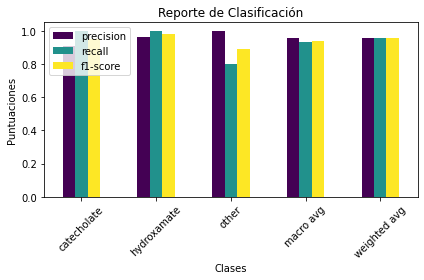

In [288]:

import matplotlib.pyplot as plt

report = classification_report(y_test, y_pred, output_dict=True)

# Convertir el reporte en un DataFrame para facilitar la manipulación
report_df = pd.DataFrame(report).transpose()
# Crear el mapeo usando cat_df
category_mapping = dict(zip(cat_df['cat_num'], cat_df['predominant_group_revised']))
category_mapping = {str(key):value for key, value in category_mapping.items()}
# Mapear los índices numéricos en report_df a los nombres de las categorías
report_df.index = report_df.index.map(lambda x: category_mapping.get(x, x))
# Eliminar la fila de 'accuracy' ya que es un valor único, no por clase
report_df = report_df.drop('accuracy', errors='ignore')

# Crear un gráfico de barras para precisión, recall y f1-score
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', colormap='viridis')
plt.title('Reporte de Clasificación')
plt.xlabel('Clases')
plt.ylabel('Puntuaciones')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


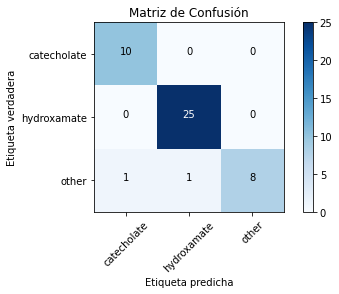

In [297]:
import itertools
import matplotlib.pyplot as plt

# Nombres de las clases para la visualización
class_names = [category_mapping[str(i)] for i in range(0, len(category_mapping.values()))]

# Visualizar la matriz de confusión con plt.imshow
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()

# Añadir marcas en los ejes y etiquetas
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Añadir anotaciones de texto en cada celda de la matriz
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

# Añadir etiquetas de ejes y un título a la gráfica
plt.tight_layout()
plt.ylabel('Etiqueta verdadera')
plt.xlabel('Etiqueta predicha')

# Mostrar la gráfica
plt.show()

# Discusion

Los resultados obtenidos de la clasificación mediante Máquina de Vectores de Soporte (SVM) revelan una alta precisión en la identificación de sideróforos basada en sus grupos quelantes predominantes. El modelo exhibió una notable capacidad discriminativa, como lo demuestra la precisión global (accuracy) del 96%, lo que sugiere que el conjunto de características moleculares seleccionado es significativo para la predicción de la función biológica de estos compuestos.

La matriz de confusión resalta una clasificación correcta en las categorías 'catecholate' y 'hydroxamate', con un rendimiento particularmente destacado en 'catecholate', donde no hubo falsos positivos ni falsos negativos. Esta eficacia podría atribuirse a características moleculares distintivas inherentes a los sideróforos de esta clase, que han sido adecuadamente capturadas por los descriptores incluidos en el análisis.

Sin embargo, la categoría 'other', que agrupa una variedad de grupos quelantes menos comunes, presenta un mayor desafío, como lo indica la presencia de falsos positivos y falsos negativos. Estos errores pueden deberse a la heterogeneidad inherente de esta categoría.

El reporte de clasificación detallado complementa estas observaciones, donde las puntuaciones de f1-score reflejan una armonía entre la precisión y la sensibilidad del modelo. Es notable que la categoría 'hydroxamate' alcanzara un f1-score de 0.98, lo que indica una alta precisión y recall, mientras que la categoría 'other' tuvo un f1-score de 0.89, sugiriendo que hay espacio para mejorar la identificación de estos sideróforos más heterogéneos o la inclusión de una mayor cantidad de datos para la clasificación con más categorías.

# Conclusiones

La aplicación de técnicas de aprendizaje automático en la clasificación de sideróforos ha demostrado ser efectiva, revelando patrones distintivos en su química que corresponden a sus funciones biológicas. El éxito del modelo SVM en categorías definidas sugiere un potencial significativo para la exploración computacional en la identificación de sideróforos. Resulta importante destacar algunas limitaciones, como la baja cantidad de datos en algunas de las categorías identificadas, la adquisición de una base de datos más grande podría ayudar con una clasificación que incluya a una mayor cantidad de grupos quelantes.

# Referencias

Hider, R. C., & Kong, X. (2010). Chemistry and biology of siderophores. Natural Product Reports, 27(5), 637-657.

Wang, P., et al. (2009). Natural products from Bacillus subtilis with antimicrobial properties. Chinese Journal of Chemical Engineering, 17(3), 478-484.